In [1]:
import pandas as pd
import torch

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Using GPU')
else:
    device = torch.device('cpu')
    print('Using CPU')

Using GPU


In [2]:
dataset = pd.read_csv('data/processed_data.csv')

In [4]:
correlation_grid = dataset.corr()


In [5]:
display(correlation_grid)

,Age,Gender,UAlb,Ucr,UACR,TC,TG,TCTG,LDLC,HDLC,...,Community_baihe,Community_chonggu,Community_huaxin,Community_jinze,Community_liantang,Community_xianghuaqiao,Community_xujin,Community_yingpu,Community_zhaoxian,Community_zhujiajiao
Age,1.000000,0.051489,0.005059,0.103760,-0.004933,-0.058046,-0.128376,0.058906,0.001573,0.051894,...,-0.110710,-0.014247,-0.043437,0.008282,0.020167,0.037574,0.075351,0.061175,-0.134220,0.106307
Gender,0.051489,1.000000,-0.036344,-0.103129,0.011934,0.165278,-0.039838,0.015687,0.116053,0.232658,...,0.013568,-0.011439,-0.026235,0.015267,0.056433,-0.009295,-0.014853,-0.006873,-0.041907,0.021977
UAlb,0.005059,-0.036344,1.000000,0.086129,0.201530,0.082292,0.095254,-0.069220,0.019369,-0.048998,...,-0.018325,-0.009355,-0.013054,-0.019318,-0.000697,0.001029,0.070130,0.053818,-0.023076,-0.040040
Ucr,0.103760,-0.103129,0.086129,1.000000,-0.016869,-0.081703,-0.012882,-0.010804,-0.041146,-0.087344,...,-0.292065,-0.223071,-0.283349,0.207694,-0.268617,0.178405,0.361748,0.427529,-0.276512,0.179393
UACR,-0.004933,0.011934,0.201530,-0.016869,1.000000,0.033598,0.019110,-0.020149,0.019844,-0.001267,...,-0.004296,-0.001826,-0.005086,-0.003906,0.038669,-0.002194,-0.001982,-0.004988,-0.005059,-0.009265
TC,-0.058046,0.165278,0.082292,-0.081703,0.033598,1.000000,0.387122,0.010924,0.738022,0.259973,...,0.009415,-0.014888,0.039549,0.001189,0.067189,-0.030822,-0.016323,-0.044734,0.017606,-0.032334
TG,-0.128376,-0.039838,0.095254,-0.012882,0.019110,0.387122,1.000000,-0.416723,-0.146266,-0.322932,...,-0.028173,-0.013773,0.014662,-0.013389,0.012550,0.024529,-0.018249,0.007838,0.051366,-0.036845
TCTG,0.058906,0.015687,-0.069220,-0.010804,-0.020149,0.010924,-0.416723,1.000000,0.166782,0.574392,...,0.027435,0.023378,-0.016820,0.008903,-0.030416,-0.006687,-0.004676,-0.024695,-0.034407,0.059675
LDLC,0.001573,0.116053,0.019369,-0.041146,0.019844,0.738022,-0.146266,0.166782,1.000000,0.207260,...,0.018183,-0.004504,0.036665,0.000752,0.051384,-0.055407,0.007472,-0.035297,-0.019021,-0.006417
HDLC,0.051894,0.232658,-0.048998,-0.087344,-0.001267,0.259973,-0.322932,0.574392,0.207260,1.000000,...,0.037736,-0.000273,-0.006470,0.025030,0.048020,-0.008452,-0.000846,-0.086868,-0.021100,0.018317


In [7]:
def Class_Split(dataset):
    Positive = dataset[dataset['DR'] == 1].reset_index()
    Negative = dataset[dataset['DR'] == 0].reset_index()
    return Positive, Negative
Positive, Negative = Class_Split(dataset)

In [14]:
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379
Age,63.00,64.00,84.00,53.00,88.00,63.00,70.00,62.00,55.00,72.00,...,61.00,72.00,71.00,57.00,69.00,70.00,70.00,66.00,53.00,57.00
Gender,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
UAlb,18.30,14.80,60.50,0.20,0.10,2.00,0.30,0.40,0.30,1.10,...,774.90,375.80,418.60,231.60,772.20,291.70,467.00,931.60,787.50,508.40
Ucr,5.00,4.00,18.00,3.00,4.00,33.00,5.00,5.00,2.00,8.00,...,13571.00,5972.00,6625.00,3065.00,9094.00,3352.00,4805.00,8681.00,7141.00,3570.00
UACR,29.10,29.30,29.50,0.30,0.50,0.50,0.50,0.70,1.10,1.10,...,505.30,556.90,559.20,668.70,751.40,770.10,860.10,949.70,975.90,1260.30
TC,4.97,3.92,3.97,8.57,4.70,4.29,5.62,6.79,4.07,4.39,...,5.67,5.26,4.96,3.11,5.41,4.63,4.66,5.45,9.62,4.38
TG,5.98,1.77,2.90,4.69,1.30,0.92,1.16,0.52,0.83,1.89,...,3.16,1.81,0.99,0.97,2.01,4.35,1.23,1.00,18.66,2.83
TCTG,0.83,2.21,1.37,1.83,3.62,4.66,4.84,13.06,4.90,2.32,...,1.79,2.91,5.01,3.21,2.69,1.06,3.79,5.45,3.88,1.55
LDLC,2.31,1.44,1.96,4.54,3.29,2.67,3.94,3.90,2.33,2.49,...,3.32,3.19,2.79,1.47,3.64,2.23,2.81,3.41,0.98,2.37
HDLC,0.97,1.71,0.94,1.74,0.88,1.22,1.26,2.23,1.31,1.12,...,1.13,1.09,1.61,1.31,1.21,1.05,1.12,1.66,0.65,1.07


In [8]:
Positive.describe()

,index,Age,Gender,UAlb,Ucr,UACR,TC,TG,TCTG,LDLC,...,Community_baihe,Community_chonggu,Community_huaxin,Community_jinze,Community_liantang,Community_xianghuaqiao,Community_xujin,Community_yingpu,Community_zhaoxian,Community_zhujiajiao
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,2718.000000,62.889752,0.538820,83.167547,2957.527950,123.837112,5.394425,1.762531,4.659612,3.249457,...,0.178571,0.072981,0.141304,0.076087,0.145963,0.107143,0.079193,0.013975,0.116460,0.068323
std,1597.618267,7.818029,0.498878,178.805458,4962.711861,319.023711,1.253254,3.429633,2.722853,1.011494,...,0.383291,0.260308,0.348606,0.265343,0.353343,0.309535,0.270249,0.117479,0.321025,0.252495
min,72.000000,36.000000,0.000000,0.100000,1.000000,0.100000,2.640000,0.270000,0.660000,1.130000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1431.500000,57.000000,0.000000,5.575000,5.000000,7.100000,4.570000,0.850000,2.807500,2.537500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2558.000000,63.000000,1.000000,15.000000,9.000000,18.300000,5.255000,1.260000,4.060000,3.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3913.000000,68.000000,1.000000,60.400000,4947.750000,69.900000,6.042500,1.952500,6.085000,3.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6373.000000,87.000000,1.000000,1072.200000,20813.000000,2772.900000,14.400000,82.400000,18.960000,8.640000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Negative.describe()

,index,Age,Gender,UAlb,Ucr,UACR,TC,TG,TCTG,LDLC,...,Community_baihe,Community_chonggu,Community_huaxin,Community_jinze,Community_liantang,Community_xianghuaqiao,Community_xujin,Community_yingpu,Community_zhaoxian,Community_zhujiajiao
count,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,...,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000
mean,3242.436890,63.941771,0.550558,46.210635,5118.509066,64.992434,5.341993,1.848736,4.387082,3.214636,...,0.109484,0.070607,0.105997,0.088040,0.100418,0.072001,0.089609,0.136855,0.105300,0.121688
std,1859.997187,7.494590,0.497481,116.449739,6129.827680,1138.504986,1.115130,1.970132,2.647939,0.944516,...,0.312273,0.256189,0.307861,0.283378,0.300583,0.258513,0.285646,0.343724,0.306966,0.326953
min,0.000000,28.000000,0.000000,0.100000,0.000000,0.100000,2.100000,0.100000,0.550000,0.220000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1626.750000,59.000000,0.000000,5.200000,7.000000,5.700000,4.620000,0.920000,2.520000,2.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3291.500000,64.000000,1.000000,12.100000,1466.500000,11.700000,5.270000,1.390000,3.790000,3.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4894.250000,69.000000,1.000000,31.800000,9666.250000,30.725000,5.970000,2.092500,5.670000,3.820000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6379.000000,92.000000,1.000000,1065.000000,22726.000000,85427.700000,25.000000,52.600000,26.820000,8.850000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
continuous_features = ['Age', 'UAlb', 'Ucr', 'UACR', 'TC', 'TG', 'TCTG','LDLC', 'HDLC', 
                           'Scr', 'BUN', 'FPG', 'HbA1c', 'Height', 'Weight', 'BMI', 'Duration']


Boxplots of DR 1 vs DR 0

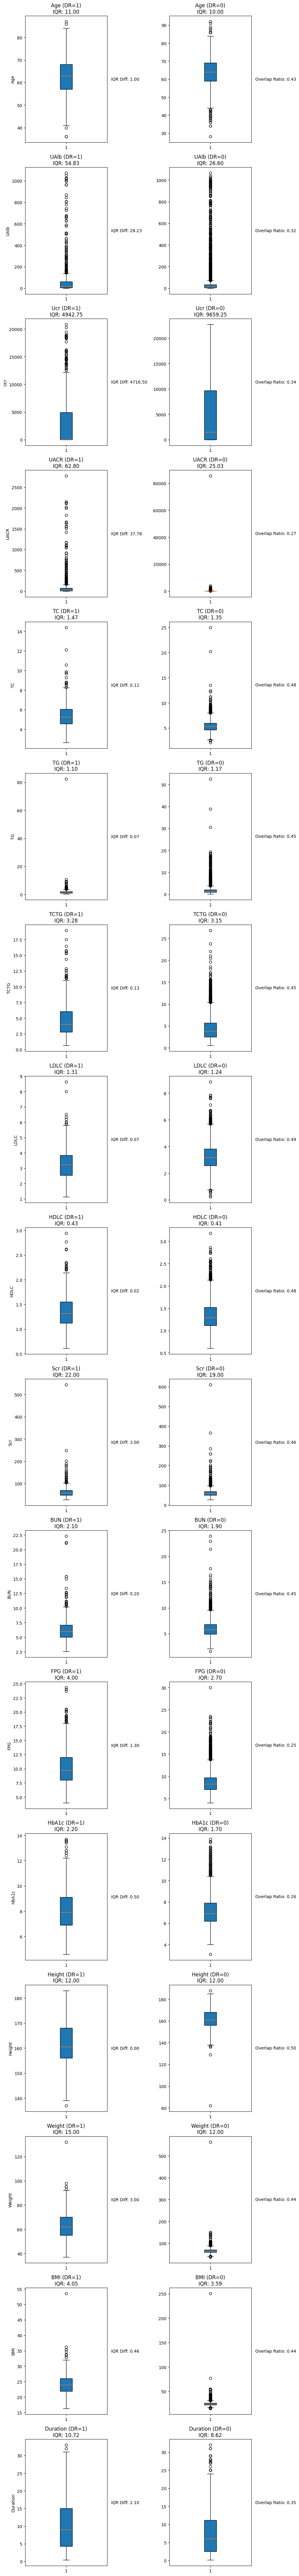

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows needed (one per feature)
num_features = len(continuous_features)
fig, axes = plt.subplots(num_features, 2, figsize=(10, 5 * num_features))  # Adjust size for readability

# Loop through each continuous feature
for i, feature in enumerate(continuous_features):
    # Calculate the IQR for Positive (DR=1) group
    Q1_positive = Positive[feature].quantile(0.25)
    Q3_positive = Positive[feature].quantile(0.75)
    IQR_positive = Q3_positive - Q1_positive
    
    # Calculate the IQR for Negative (DR=0) group
    Q1_negative = Negative[feature].quantile(0.25)
    Q3_negative = Negative[feature].quantile(0.75)
    IQR_negative = Q3_negative - Q1_negative
    
    # Calculate IQR Difference (this will be the similarity score)
    IQR_diff = abs(IQR_positive - IQR_negative)

    # Calculate the Overlap Ratio (as another similarity score)
    overlap = max(0, min(Q3_positive, Q3_negative) - max(Q1_positive, Q1_negative))
    overlap_ratio = overlap / (IQR_positive + IQR_negative) if (IQR_positive + IQR_negative) != 0 else 0

    # Left subplot: DR = 1 (Positive cases)
    axes[i, 0].boxplot(Positive[feature].dropna(), vert=True, patch_artist=True)
    axes[i, 0].set_title(f"{feature} (DR=1)\nIQR: {IQR_positive:.2f}")
    axes[i, 0].set_ylabel(feature)

    # Right subplot: DR = 0 (Negative cases)
    axes[i, 1].boxplot(Negative[feature].dropna(), vert=True, patch_artist=True)
    axes[i, 1].set_title(f"{feature} (DR=0)\nIQR: {IQR_negative:.2f}")
    
    # Display the similarity score (difference or overlap)
    axes[i, 0].text(1.05, 0.5, f'IQR Diff: {IQR_diff:.2f}', transform=axes[i, 0].transAxes, 
                    fontsize=10, va='center', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    axes[i, 1].text(1.05, 0.5, f'Overlap Ratio: {overlap_ratio:.2f}', transform=axes[i, 1].transAxes, 
                    fontsize=10, va='center', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig('data/boxplot_outliers_with_similarity.png', dpi=300)  # Save with high resolution

# Show the plot
plt.show()


C:\Users\TAN LE ZHAN\AppData\Local\Temp\ipykernel_11144\1727922714.py:40: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


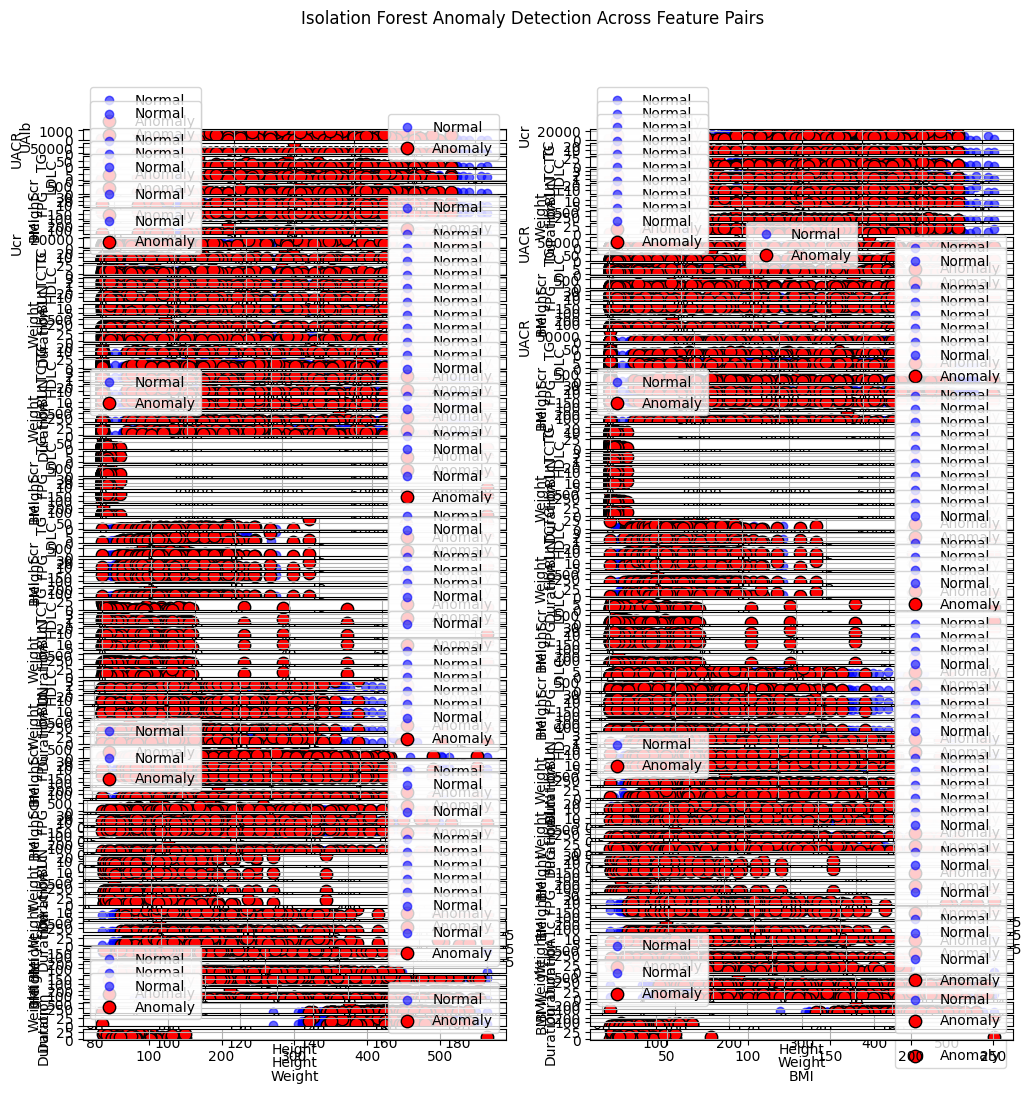

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = dataset  # Or use df = your_dataframe

# Select only numerical features for Isolation Forest
X = df.select_dtypes(include=[np.number])
X = X[continuous_features]
# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 2: Apply Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X_scaled)
df["anomaly"] = clf.predict(X_scaled)  # -1 = anomaly, 1 = normal

# Step 3: Plot Isolation Forest results for each feature pair
feature_pairs = list(combinations(X.columns, 2))  # Get all feature pairs

plt.figure(figsize=(12, 12))
for i, (feat1, feat2) in enumerate(feature_pairs, 1):
    plt.subplot(len(feature_pairs) // 2 + 1, 2, i)
    plt.scatter(df[feat1][df["anomaly"] == 1], df[feat2][df["anomaly"] == 1], 
                c="blue", label="Normal", alpha=0.6)
    plt.scatter(df[feat1][df["anomaly"] == -1], df[feat2][df["anomaly"] == -1], 
                c="red", label="Anomaly", edgecolors="black", s=80)
    
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.legend()
    plt.grid(True)

plt.suptitle("Isolation Forest Anomaly Detection Across Feature Pairs")
plt.tight_layout()
plt.show()
